#Logistic Regression ROC Curve and ROC AUC Score

#The Area Under the ROC curve (AUC) is an aggregated metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. It can range from 0.5 to 1, and the larger it is the better.

In [27]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [28]:
X,y = make_classification(n_samples=1000,n_classes=2,random_state=1)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#ROC curve
A graph that shows how well a model can distinguish between positive and negative outcomes. The ROC curve can help you choose a threshold value that balances your tolerance for false negatives and desire for true positives.

#AUC
A metric that represents the probability that a model will rank a randomly chosen positive example higher than a negative example. The AUC can range from 0.5 to 1, with a higher AUC indicating better performance. A perfect model has an AUC of 1, while a random model has an AUC of 0.5.


#Generate a no skill prediction(majority class)

#we have created dummy_model with default output as zero

In [30]:
#we have created dummy_model with default output as zero.
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [31]:
#Create a Basic model
model  = LogisticRegression()
model

LogisticRegression()

In [32]:
#training model
model.fit(X_train,y_train)

LogisticRegression()

#Prediction Based on Probability

In [33]:
model_prob = model.predict_proba(X_test)



In [34]:
model_prob

array([[8.17237415e-02, 9.18276259e-01],
       [1.13344259e-01, 8.86655741e-01],
       [9.76832552e-01, 2.31674481e-02],
       [1.81093915e-02, 9.81890609e-01],
       [4.54686794e-02, 9.54531321e-01],
       [2.03249282e-01, 7.96750718e-01],
       [9.93162656e-01, 6.83734407e-03],
       [9.45976087e-01, 5.40239126e-02],
       [8.69028777e-03, 9.91309712e-01],
       [5.91398651e-01, 4.08601349e-01],
       [9.85074068e-01, 1.49259319e-02],
       [8.29281652e-02, 9.17071835e-01],
       [1.37466495e-01, 8.62533505e-01],
       [5.20697767e-03, 9.94793022e-01],
       [9.60063575e-01, 3.99364247e-02],
       [9.50688533e-01, 4.93114672e-02],
       [2.10393564e-02, 9.78960644e-01],
       [8.30240259e-01, 1.69759741e-01],
       [9.62818718e-01, 3.71812822e-02],
       [3.21780632e-02, 9.67821937e-01],
       [9.96085581e-01, 3.91441895e-03],
       [1.14045645e-01, 8.85954355e-01],
       [1.80352806e-01, 8.19647194e-01],
       [4.30414556e-01, 5.69585444e-01],
       [4.115915

In [35]:
#Lets focus on postive outcomes
model_prob = model_prob[:,1]  # Only if model_prob is 2-dimensional

#These all are my positive outcomes

In [36]:
model_prob

array([9.18276259e-01, 8.86655741e-01, 2.31674481e-02, 9.81890609e-01,
       9.54531321e-01, 7.96750718e-01, 6.83734407e-03, 5.40239126e-02,
       9.91309712e-01, 4.08601349e-01, 1.49259319e-02, 9.17071835e-01,
       8.62533505e-01, 9.94793022e-01, 3.99364247e-02, 4.93114672e-02,
       9.78960644e-01, 1.69759741e-01, 3.71812822e-02, 9.67821937e-01,
       3.91441895e-03, 8.85954355e-01, 8.19647194e-01, 5.69585444e-01,
       5.88408407e-01, 9.73099363e-01, 9.65994342e-01, 2.73877518e-03,
       8.01595231e-01, 1.39002986e-01, 3.52089123e-02, 2.85090339e-01,
       8.10370535e-01, 1.02046853e-01, 9.00968269e-01, 1.04921781e-01,
       6.87638127e-03, 9.69967236e-02, 3.08984187e-02, 7.44365926e-01,
       5.29696559e-02, 1.45061252e-02, 4.47168571e-01, 6.62185322e-01,
       9.42074010e-01, 9.99408591e-01, 9.66013718e-01, 3.60317284e-01,
       1.43606468e-01, 1.42698355e-01, 5.19022312e-01, 6.34300275e-02,
       9.15522435e-01, 8.15943076e-01, 6.17835757e-01, 7.87717087e-02,
      

In [37]:
#Lets caluclate the ROC AUC scores now
auc = roc_auc_score(y_test,dummy_model_prob)
print(auc)
model_auc = roc_auc_score(y_test,model_prob)
print(model_auc)

0.5
0.907648


In [45]:
#Lets caluclate the ROC scores now
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)



In [46]:
thresholds

array([           inf, 9.99408591e-01, 9.48789051e-01, 9.45875797e-01,
       9.35535228e-01, 9.34011458e-01, 9.28076959e-01, 9.26098222e-01,
       9.09462284e-01, 9.01743080e-01, 8.97971882e-01, 8.87913921e-01,
       8.55039135e-01, 8.50088338e-01, 8.45804170e-01, 8.32576905e-01,
       8.19647194e-01, 8.15943076e-01, 8.07941846e-01, 8.01595231e-01,
       7.72502908e-01, 7.72061776e-01, 7.18381195e-01, 7.16495666e-01,
       6.62185322e-01, 6.29275041e-01, 6.17835757e-01, 6.10039921e-01,
       5.96301960e-01, 5.88408407e-01, 5.69585444e-01, 5.42664587e-01,
       5.29164218e-01, 5.13611459e-01, 5.10245990e-01, 4.87974294e-01,
       4.84907445e-01, 4.56156711e-01, 4.47168571e-01, 4.26498394e-01,
       3.64869889e-01, 3.56886293e-01, 3.46033141e-01, 3.08051495e-01,
       3.01298121e-01, 2.85600699e-01, 2.85090339e-01, 2.18727039e-01,
       1.97022170e-01, 1.34038345e-01, 1.33315877e-01, 1.30519699e-01,
       1.27153287e-01, 1.04921781e-01, 1.04292580e-01, 7.04849255e-02,
      

In [41]:
model_fpr #False postive Rate

array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
       0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
       0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
       0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
       0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
       0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
       0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
       1.   ])

In [ ]:
model_tpr #True postive Rate

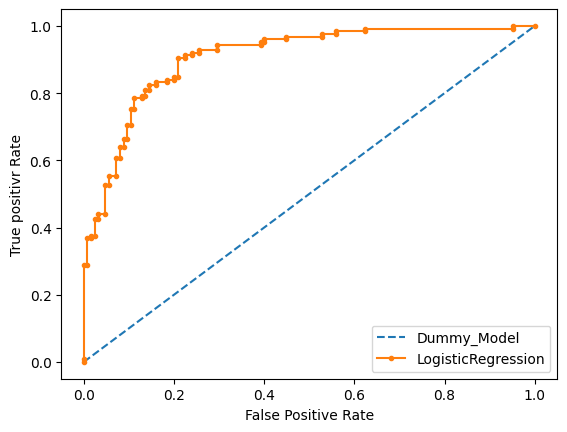

In [40]:
##Ploting ROC curvees
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label="Dummy_Model")
pyplot.plot(model_fpr,model_tpr,marker='.',label="LogisticRegression")
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True positivr Rate")
pyplot.legend()
pyplot.show()

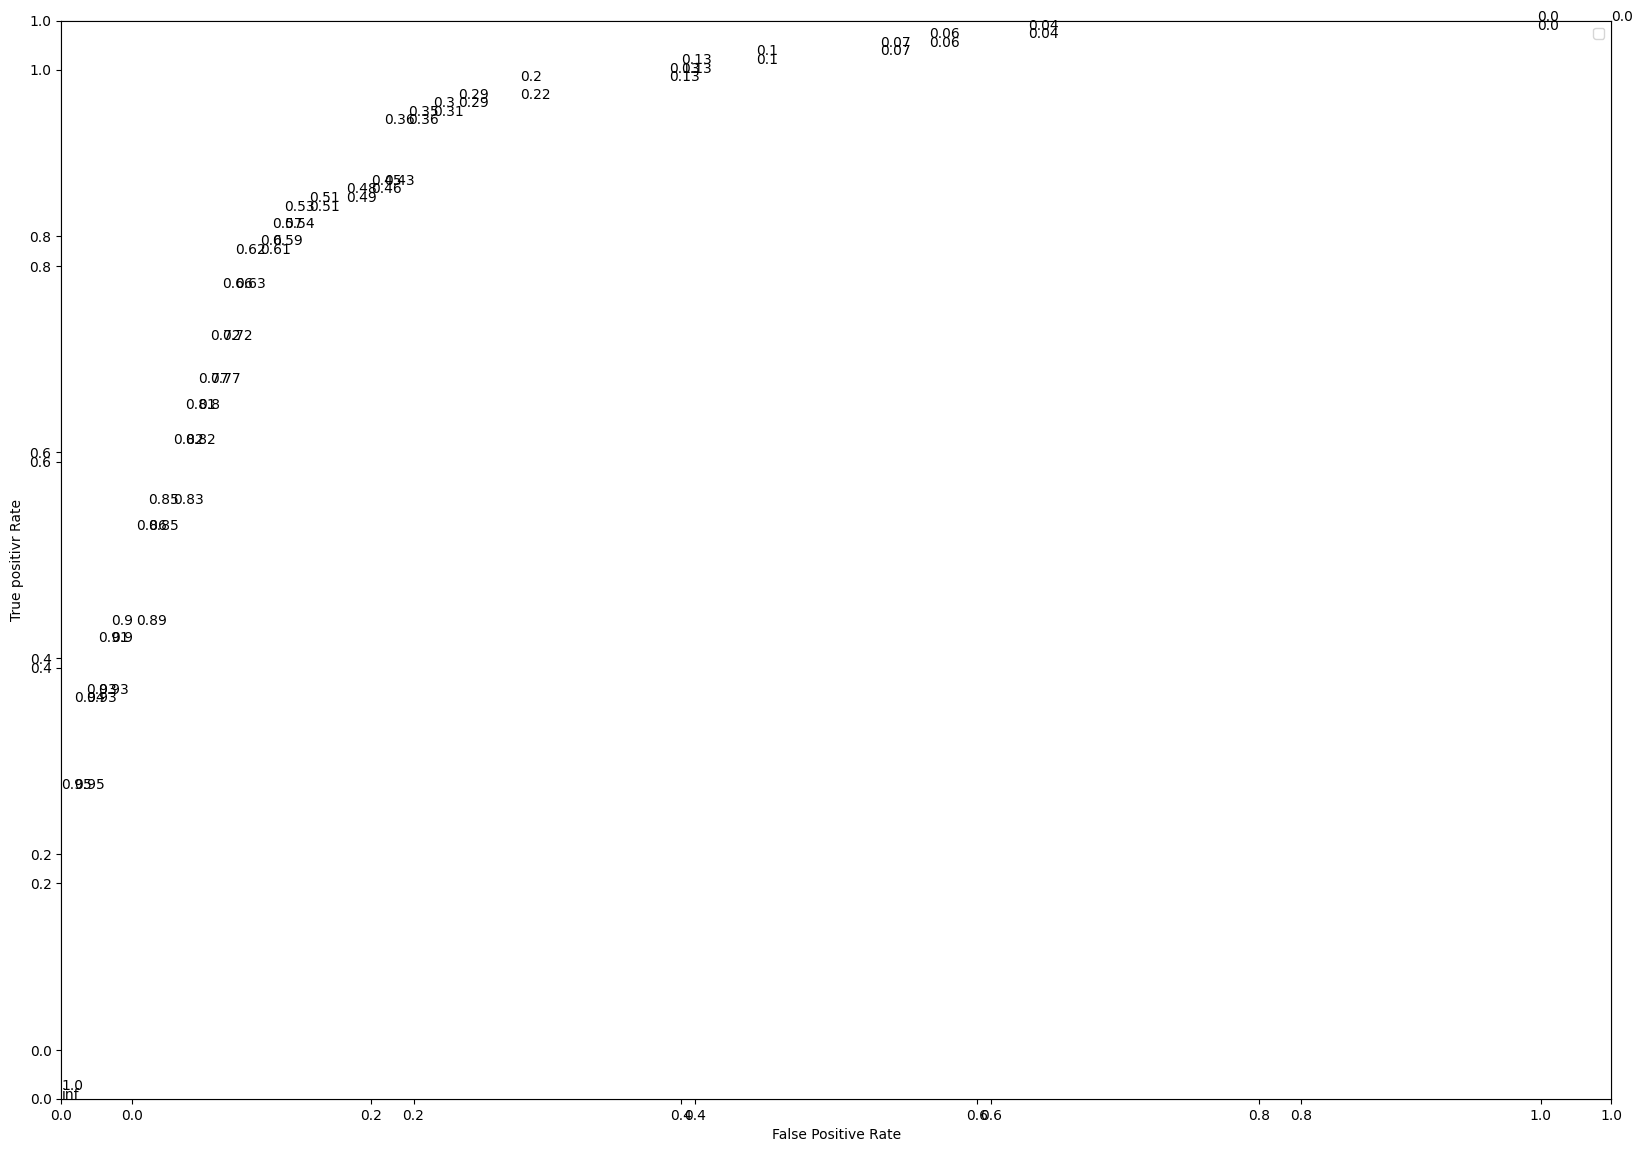

In [54]:
#plot roc curve for our model to get threshold for every data point
import numpy as np
fig = pyplot.figure(figsize=(20,14))
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label="Dummy_Model")
pyplot.plot(model_fpr,model_tpr,marker='.',label="LogisticRegression")
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(xyz[2], 2)}', xy=(xyz[0], xyz[1]))
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True positivr Rate")
pyplot.legend()
pyplot.show()
